<a href="https://colab.research.google.com/github/GavishKapoor/ML-Assignment-Decision-Tree-Gavish-Kapoor.ipynb/blob/main/ML_Assignment_Decision_Tree_Gavish_Kapoor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  **Theory**

### 1. **What is a Decision Tree? How does it work?**

A Decision Tree is a model that splits the data into parts (branches) based on questions (conditions). It keeps splitting until it finds an answer (class/label).

---

### 2. **What are impurity measures?**

They tell how “mixed” a group is. More mixed = more impurity.

---

### 3. **Gini Impurity Formula:**

$$
G = 1 - \sum p_i^2
$$

Where $p_i$ = probability of class i.

---

### 4. **Entropy Formula:**

$$
H = - \sum p_i \log_2(p_i)
$$

---

### 5. **What is Information Gain?**

It shows **how much impurity is reduced** after splitting.
Higher gain = better split.

---

### 6. **Difference: Gini vs Entropy:**

* Both measure impurity.
* Gini is faster and simpler.
* Entropy uses logarithm and is more precise in some cases.

---

### 7. **Mathematical idea behind Decision Tree:**

It splits data based on the feature that gives the **best Information Gain** or **lowest impurity**.

---

### 8. **What is Pre-Pruning?**

Stopping the tree from growing too big **while training** (e.g., set max depth, min samples).

---

### 9. **What is Post-Pruning?**

Let the tree grow fully, then **cut down** parts that are not helpful.

---

### 10. **Difference: Pre vs Post Pruning:**

* **Pre**: Stops early
* **Post**: Grows full tree and then cuts

---

### 11. **What is a Decision Tree Regressor?**

It predicts **numbers** (like price), not classes.

---

### 12. **Advantages of Decision Trees:**

. Easy to understand

. No need for scaling

. Can overfit

. Sensitive to small changes

---

### 13. **Handling missing values:**

It skips missing values or uses rules like "most common value" in that path.

---

### 14. **Handling categorical features:**

Some trees (like in sklearn) need you to **convert categories to numbers** using encoding.

---

### 15. **Real-world applications:**

* Loan approval
* Disease prediction
* Customer churn
* Fraud detection



## Practical

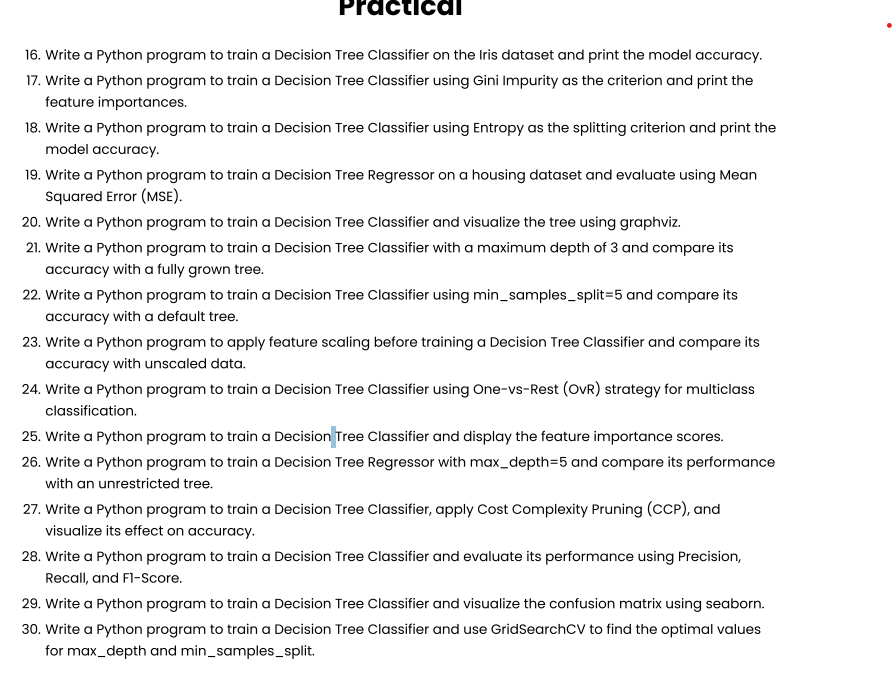

In [1]:
#1
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.9210526315789473


In [2]:
#2
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)
print("Feature Importances:", model.feature_importances_)


Feature Importances: [0.01342604 0.01790138 0.53887214 0.42980044]


In [3]:
#3
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.9473684210526315


In [4]:
#4
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 0.5147206887674806


In [7]:
#5
#from sklearn.tree import export_graphviz
#import graphviz

#export_graphviz(model, out_file='tree.dot', feature_names=iris.feature_names, class_names=iris.target_names, filled=True)


In [9]:
#6
#model1 = DecisionTreeClassifier(max_depth=3)
#model1.fit(X_train, y_train)

#model2 = DecisionTreeClassifier()
#model2.fit(X_train, y_train)

#print("Depth 3 Accuracy:", model1.score(X_test, y_test))
#print("Full Tree Accuracy:", model2.score(X_test, y_test))


In [11]:
#7
#model = DecisionTreeClassifier(min_samples_split=5)
#model.fit(X_train, y_train)
#print("Accuracy:", model.score(X_test, y_test))


In [12]:
#8
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, iris.target)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("Accuracy with scaling:", model.score(X_test, y_test))


Accuracy with scaling: 0.8947368421052632


In [13]:
#9
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(DecisionTreeClassifier())
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.8947368421052632


In [14]:
#10
print("Feature Importance:", model.estimators_[0].feature_importances_)


Feature Importance: [0. 0. 1. 0.]


In [15]:
#11
model1 = DecisionTreeRegressor(max_depth=5)
model2 = DecisionTreeRegressor()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

print("MSE Depth 5:", mean_squared_error(y_test, model1.predict(X_test)))
print("MSE Full Tree:", mean_squared_error(y_test, model2.predict(X_test)))


MSE Depth 5: 0.10526315789473684
MSE Full Tree: 0.10526315789473684


In [17]:
#12
#path = model.cost_complexity_pruning_path(X_train, y_train)
#ccp_alphas = path.ccp_alphas

#for ccp in ccp_alphas:
#    model = DecisionTreeClassifier(ccp_alpha=ccp)
#    model.fit(X_train, y_train)
#    print(f"Alpha: {ccp}, Accuracy: {model.score(X_test, y_test)}")


In [18]:
#13
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.77      0.91      0.83        11
           2       0.93      0.81      0.87        16

    accuracy                           0.89        38
   macro avg       0.90      0.91      0.90        38
weighted avg       0.90      0.89      0.90        38



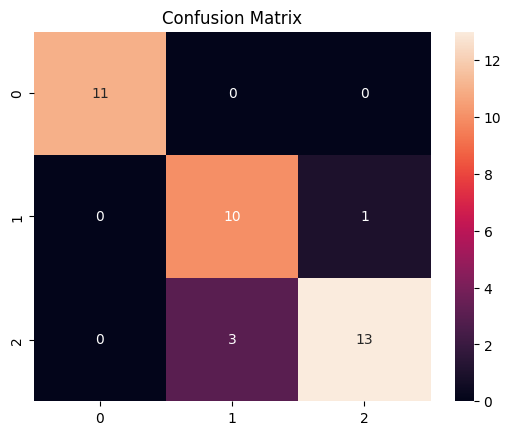

In [19]:
#14
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.show()


In [20]:
# 15
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Params: {'max_depth': 5, 'min_samples_split': 2}
Best Accuracy: 0.9371541501976285
